# Callin Switzer
## Compare NNet preds with Jorge's solutions
## 2 Sept 2018

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import os
import pandas as pd
import time
from datetime import datetime
import sys
import csv
import seaborn as sns
import scipy.io
import subprocess
import csv

print(sys.version, "\n")

now = datetime.now()
print("last run on " + str(now))

#%qtconsole

# define directories
baseDir = os.getcwd()
dataDir = r'D:\MothSimulations\11c-AggressiveManeuver\Qstore\hws_am_con'
figDir = r'D:\Dropbox\mothMachineLearning_dataAndFigs\Figs'
dataOutput = r'D:\Dropbox\mothMachineLearning_dataAndFigs\DataOutput'
savedModels = r'D:\Dropbox\mothMachineLearning_dataAndFigs\savedModels'
if not os.path.exists(dataOutput):
    os.mkdir(dataOutput)


3.6.4 |Anaconda custom (64-bit)| (default, Jan 16 2018, 10:22:32) [MSC v.1900 64 bit (AMD64)] 

last run on 2018-10-04 15:10:40.513462


In [2]:
# check to make sure it aligns with my original dataset
orDat= pd.read_csv(os.path.join(dataOutput, "NNpreds.csv"))

In [3]:
orDat.head()

,x_0,y_0,phi_0,theta_0,x_dot_0,y_dot_0,phi_dot_0,theta_dot_0,F_pred,alpha_pred,tau_pred,x_99,y_99,phi_99,theta_99,x_dot_99_pred,y_dot_99_pred,phi_dot_99_pred,theta_dot_99_pred
0,0.262194,-9.544672,5.224991,0.777590,-46.852167,-0.677334,-0.296395,-0.268426,36046.0040,3.557195,86448.84,-2.649455,-16.019851,5.293197,0.969371,-227.155460,-651.43800,7.388257,13.609400
1,0.075806,7.723757,4.110861,0.778734,340.169458,81.327298,-1.458512,-1.615854,29249.3800,5.195285,-17680.14,11.802986,7.446455,4.030211,0.675778,834.259160,-118.34230,-6.747110,-7.881252
2,-0.067851,-9.288991,3.995672,0.781264,69.075129,233.945205,-0.271714,3.114568,9240.1290,4.872288,48568.76,2.685157,-5.772373,3.973297,0.828877,205.397450,119.78773,-1.961641,1.506449
3,-0.278383,5.935364,4.131035,0.793421,4.855971,-160.095031,0.493889,-0.485404,38036.5660,3.449874,-25356.29,-3.346734,-3.568742,4.140354,0.767586,-316.916300,-788.68823,0.443989,-1.335863
4,-0.790712,6.862221,3.998543,0.788970,21.196818,221.980546,1.761272,1.654365,7563.6387,4.037069,35999.10,-0.126487,9.712942,4.020153,0.862082,45.035244,66.17256,0.558920,3.127698


In [4]:
# read in data
predWSim = pd.read_csv(os.path.join(dataOutput, "NNpreds_output_all_w_sim.csv") )

In [5]:
# remove empty column
predWSim.dropna(axis = 1, inplace= True)

In [6]:
predWSim.head()

,x_0,y_0,phi_0,theta_0,x_dot_0,y_dot_0,phi_dot_0,theta_dot_0,F_pred,alpha_pred,...,phi_dot_99_pred,theta_dot_99_pred,x_a,y_a,phi_a,theta_a,x_dot_a,y_dot_a,phi_dot_a,theta_dot_a
0,0.262190,-9.5447,5.2250,0.77759,-46.852,-0.67733,-0.29639,-0.26843,36046.0,3.5572,...,7.38830,13.6090,-2.6685,-16.0590,5.2938,0.96960,-229.060,-652.580,7.36040,13.5230
1,0.075806,7.7238,4.1109,0.77873,340.170,81.32700,-1.45850,-1.61590,29249.0,5.1953,...,-6.74710,-7.8813,11.8570,7.4454,4.0298,0.67493,834.940,-118.180,-6.73180,-7.8699
2,-0.067851,-9.2890,3.9957,0.78126,69.075,233.95000,-0.27171,3.11460,9240.1,4.8723,...,-1.96160,1.5064,2.6830,-5.7646,3.9734,0.82882,206.650,119.660,-1.95060,1.5404
3,-0.278380,5.9354,4.1310,0.79342,4.856,-160.10000,0.49389,-0.48540,38037.0,3.4499,...,0.44399,-1.3359,-3.3660,-3.5855,4.1404,0.76773,-315.740,-790.600,0.44304,-1.3167
4,-0.790710,6.8622,3.9985,0.78897,21.197,221.98000,1.76130,1.65440,7563.6,4.0371,...,0.55892,3.1277,-0.1489,9.7200,4.0204,0.86236,43.155,65.532,0.57572,3.1531


In [ ]:
# Check that items are aligned
np.allclose(orDat.iloc[:, 0:10], predWSim.iloc[:, 0:10], rtol = 1e-04)

In [ ]:
# plot predicted vs. actual
plt.figure(figsize = [10,10])
plt.scatter(x = predWSim.loc[0:1000, "x_99"], y = predWSim.loc[0:1000,  "y_99"])
#plt.scatter(x = predWSim.loc[:, "x_a"], y = predWSim.loc[:,  "y_a"], alpha = 1)
#plt.close() # makes fig not show

In [ ]:
# plot predicted vs. actual
plt.figure(figsize = [10,10])
plt.scatter(x = predWSim.loc[:, "x_dot_99_pred"], y = predWSim.loc[:,  "y_dot_99_pred"])
plt.scatter(x = predWSim.loc[:, "x_dot_a"], y = predWSim.loc[:,  "y_dot_a"], alpha = 1)

In [ ]:
plt.scatter(x = predWSim.loc[:, "x_99"], y =  predWSim.loc[:,  "x_a"] )
plt.ylabel("actual")
plt.xlabel("predicted")
#plt.hlines(y = 0, xmin = -10, xmax = 10)


In [ ]:
plt.scatter(x = predWSim.loc[:, "x_99"], y =  predWSim.loc[:,  "x_a"] -predWSim.loc[:, "x_99"] )
plt.ylabel("actual - predicted")
plt.xlabel("actual")
plt.hlines(y = 0, xmin = -10, xmax = 10)

plt.show()
plt.scatter(x = predWSim.loc[:, "y_99"], y =  predWSim.loc[:,  "y_a"] -predWSim.loc[:, "y_99"] )
plt.ylabel("actual - predicted")
plt.xlabel("actual")
plt.hlines(y = 0, xmin = -10, xmax = 10)

plt.show()
plt.scatter(x = predWSim.loc[:, "y_dot_99_pred"], y =  predWSim.loc[:,  "y_dot_a"] -predWSim.loc[:, "y_dot_99_pred"] )
plt.ylabel("actual - predicted")
plt.xlabel("actual")
plt.hlines(y = 0, xmin = -10, xmax = 10)

In [8]:
predsNames = ["_".join(jj.split("_")[0:3])  for jj in predWSim.columns[11:19]]
actualNames = ["_".join(jj.split("_")[0:-1]) + "_actual" for jj in predWSim.columns[19:]]
nms = [predsNames[ii][0:len(predsNames[ii])-3] + "_final" for ii in range(len(predsNames))]
print(predsNames)
print(actualNames)

['x_99', 'y_99', 'phi_99', 'theta_99', 'x_dot_99', 'y_dot_99', 'phi_dot_99', 'theta_dot_99']
['x_actual', 'y_actual', 'phi_actual', 'theta_actual', 'x_dot_actual', 'y_dot_actual', 'phi_dot_actual', 'theta_dot_actual']


In [ ]:
# make plots
plt.close("all")
fig, axs = plt.subplots(2,8, figsize=(30, 10), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.1, wspace=0.5)
#fig.suptitle('Predicted vs. acutal ', fontsize=14, fontweight='bold')

axs = axs.ravel()

# replace lightest colors with white
import matplotlib.colors

cmap = plt.cm.magma_r
cmaplist = np.array([cmap(i) for i in range(cmap.N)])
cmaplist[:,0:3] = np.divide(cmaplist[:, 0:3], 1.1)
cmaplist[0] = (1,1,1,0.5)
cmap = matplotlib.colors.LinearSegmentedColormap.from_list('mcm',cmaplist, cmap.N)

for ii in range(len(predsNames)):
    try:
        axs[ii].hexbin(y = predWSim.iloc[:,ii+11],x = predWSim.iloc[:,ii+ 19], gridsize = 50, cmap = cmap)
        #axs[ii].set_xlabel("Predicted Value\n(unscaled)")
        if(ii == 0):
            axs[ii].set_ylabel("Actual Value\n(based on simulation)")
        axs[ii].set_title(nms[ii])
        axs[ii].plot(predWSim.iloc[:,ii+11], predWSim.iloc[:,ii+11], 'grey', linewidth = 1, linestyle  = "--")
    except:
        pass

# residual plots x = predicted, y = actual - predicted
for jj in np.arange(0, len(predsNames)):
    
    ii = jj + 8
    try:
        axs[ii].hexbin(x = predWSim.iloc[:,jj+11],
                     y = predWSim.iloc[:,jj+ 19 ] - predWSim.iloc[:,jj+11], gridsize = (35, 50), cmap = cmap)
        
        if(jj > 3):
            axs[ii].set_xlabel("Predicted Value\n(based on NNet)")
        else:
            axs[ii].set_xlabel("Input Value\n(Fed to NNet)")
        if(jj == 0):
            axs[ii].set_ylabel("Actual - Predicted")
        axs[ii].hlines(y = 0, xmin = np.min(predWSim.iloc[:,jj+11]), 
                       xmax = np.max(predWSim.iloc[:,jj+11]), linestyle =  "--", linewidth = 1)

        
    except:
        pass

fig.savefig(os.path.join(figDir, "PredVActual_Sim_big.png"), dpi = 500, bbox_inches='tight')
plt.close()

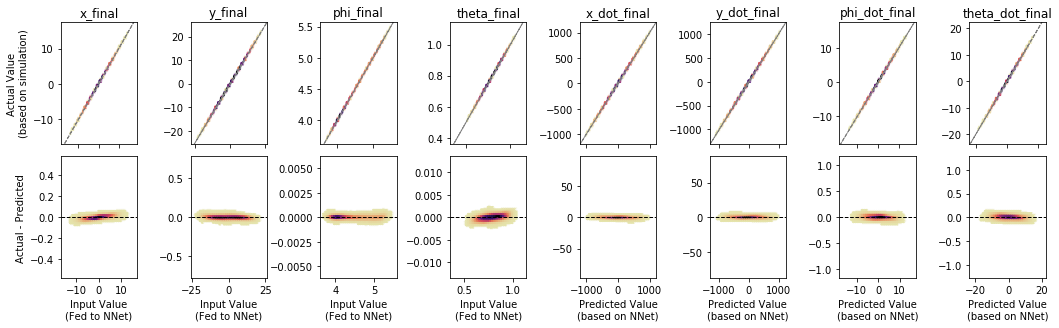

In [29]:
# make plots
plt.close("all")
fig, axs = plt.subplots(2,8, figsize=np.array((30, 8)) / 1.7, facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.1, wspace=0.7)
#fig.suptitle('Predicted vs. acutal ', fontsize=14, fontweight='bold')

axs = axs.ravel()

# replace lightest colors with white
import matplotlib.colors

cmap = plt.cm.magma_r
cmaplist = np.array([cmap(i) for i in range(cmap.N)])
cmaplist[:,0:3] = np.divide(cmaplist[:, 0:3], 1.1)
cmaplist[0] = (1,1,1,0.5)
cmap = matplotlib.colors.LinearSegmentedColormap.from_list('mcm',cmaplist, cmap.N)

for ii in range(len(predsNames)):
    try:
        axs[ii].hexbin(y = predWSim.iloc[:,ii+11],x = predWSim.iloc[:,ii+ 19], gridsize = 50, cmap = cmap)
        if(ii == 0):
            axs[ii].set_ylabel("Actual Value\n(based on simulation)")
        axs[ii].set_title(nms[ii])
        axs[ii].plot(predWSim.iloc[:,ii+11], predWSim.iloc[:,ii+11], 'grey', linewidth = 1, linestyle  = "--")
        axs[ii].axes.xaxis.set_ticklabels([])
    except:
        pass

# residual plots x = predicted, y = actual - predicted
for jj in np.arange(0, len(predsNames)):
    
    ii = jj + 8
    try:
        axs[ii].hexbin(x = predWSim.iloc[:,jj+11],
                     y = predWSim.iloc[:,jj+ 19 ] - predWSim.iloc[:,jj+11], gridsize = (35, 50), cmap = cmap)
        
        mmin = np.min(predWSim.iloc[:,jj+ 19 ] - predWSim.iloc[:,jj+11])
        mmax = np.max(predWSim.iloc[:,jj+ 19 ] - predWSim.iloc[:,jj+11])
        
        upper = np.max([np.abs(mmin), np.abs(mmax)])
        
        axs[ii].set_ylim(-upper, upper)
        
        if(jj > 3):
            axs[ii].set_xlabel("Predicted Value\n(based on NNet)")
        else:
            axs[ii].set_xlabel("Input Value\n(Fed to NNet)")
        if(jj == 0):
            axs[ii].set_ylabel("Actual - Predicted")
        axs[ii].hlines(y = 0, xmin = np.min(predWSim.iloc[:,jj+11]), 
                       xmax = np.max(predWSim.iloc[:,jj+11]), linestyle =  "--", linewidth = 1)

        
    except:
        pass

fig.savefig(os.path.join(figDir, "PredVActual_Sim__largeTxt2.png"), dpi = 500, bbox_inches='tight')
#plt.close()

In [23]:
upper = np.max([np.abs(mmin), np.abs(mmax)])
upper

1.2847

___
### Calculate some accuracy metrics
___



In [ ]:
from sklearn.metrics import mean_squared_error

from sklearn.metrics import r2_score

In [ ]:
for ii in range(len(nms)):
    #np.sqrt(mean_squared_error(Ytest.iloc[0:1000,ii], nnpreds_unscaled[:,ii]))
    print(r2_score(predWSim.iloc[:,ii+11], predWSim.iloc[:,ii+ 19]), nms[ii])

In [ ]:
# # load model
# from keras.models import load_model

In [ ]:
# model = load_model(os.path.join(savedModels, 'my_model.h5'))

In [ ]:
# model.summary()

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error(predWSim.x_99, predWSim.x_a)

In [ ]:
mean_squared_error(predWSim.y_99, predWSim.y_a)

In [ ]:

plt.scatter(x = predWSim.x_99,
                     y = predWSim.x_a - predWSim.x_99)

In [ ]:
# check how many inputs were in the training set

In [ ]:
dataDir2 = r"D:\Dropbox\mothMachineLearning_dataAndFigs\DataOutput"
trainDF2 = pd.read_csv(os.path.join(dataDir2, "smallDF.csv"))
trainDF2.head()

In [ ]:
X = trainDF2.loc[:, ["x_0", "y_0", "phi_0", "theta_0", 
                    "x_99", "y_99", "phi_99", "theta_99", 
                   "x_dot_0", "y_dot_0", "phi_dot_0", "theta_dot_0"]]

Y = trainDF2.loc[:, ["Fx", "Fy", "tau", "x_dot_99", "y_dot_99", 
                    "phi_dot_99", "theta_dot_99"] ]

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state = 123)

In [ ]:
Xtrain.shape

In [ ]:
# check for duplicates in xtrain and xtest -- no exact duplicates
aa = Xtrain.merge(Xtest, how="inner")
print(aa.shape)
print(aa.drop_duplicates().shape)
aa.head()

In [ ]:
# check just initial conditions w/0 derivatives -- all are in test set
aa = Xtrain.iloc[:, 0:4].drop_duplicates().merge(Xtest.iloc[:,0:4].drop_duplicates(), how="inner")
print(aa.shape)
print(aa.drop_duplicates().shape)
aa.head()

In [ ]:
Xtrain.iloc[:, 0:5].head()

In [ ]:
trainDF2.x_0.nunique(), Xtrain.x_0.nunique()

In [ ]:
trainDF2.y_99.nunique(), Xtrain.y_99.nunique()

In [ ]:
comparDF = Xtrain.loc[:, ['x_0', 'y_0', 'phi_0', 'theta_0', 'x_dot_0', 'y_dot_0',
       'phi_dot_0', 'theta_dot_0']]
len(comparDF)

In [ ]:
comparDF.drop_duplicates(inplace=True)

In [ ]:
comparDF.shape

In [ ]:
cdf2 = orDat.loc[:, comparDF.columns]#.drop_duplicates()

In [ ]:
print(cdf2.shape)
cdf2.head()

In [ ]:
# lots of our starting conditions are also in the training set ~ 592/1000

aa = cdf2.merge(comparDF, how="inner")
print(aa.shape)
print(aa.drop_duplicates().shape)
aa.head()

In [ ]:
comparDF.loc[comparDF.x_0 == aa.iloc[0,0],:]

In [ ]:
comparDF = Xtrain.loc[:, ['x_0', 'y_0', 'phi_0', 'theta_0', 
                          'x_dot_0', 'y_dot_0','phi_dot_0', 'theta_dot_0', 
                          "x_99", "y_99", "phi_99", "theta_99"]].drop_duplicates()
cdf2 = orDat.loc[:, comparDF.columns]#.drop_duplicates()

In [ ]:
comparDF.shape

In [ ]:
bb = pd.merge(cdf2, comparDF, how='inner')
print(bb.shape)
print(bb.drop_duplicates().shape)
bb.head()

In [ ]:
np.sum(cdf2.x_0.isin(comparDF.x_0) & cdf2.y_0.isin(comparDF.y_0) & cdf2.y_99_pred.isin(comparDF.y_99))